In [1]:
import os
import numpy as np
from PIL import Image

In [2]:
# Preprocess Images
def preprocess_image(image_path, width=100, height=50):
    # Read the image
    img = Image.open(image_path)
    # Resize so we have a constant image size
    img = img.resize((width, height), Image.ANTIALIAS)
    # Convert to greyscale to reduce dimensions by eliminating RGB layers
    img = img.convert("L")
    
    # Return image data in np array
    return np.array(img).reshape(width * height)

In [3]:
# Get all files
def get_images(path):
    allFiles = []
    for root, subfiles, files in os.walk(os.path.join("data", path)):
        for names in files:
            allFiles.append(os.path.join(root, names))
    return allFiles

In [4]:
# Do the actual preprocessing
data_x, data_y = [], []
for im in (("plate_number", 1), ("negative_images", 0)):
    all_images = get_images(im[0])
    for image in all_images:
        data_x.append(preprocess_image(image))
        data_y.append(im[1])
data_x, data_y = np.array(data_x), np.array(data_y)

In [5]:
# The fun begins
# Activation functions
relu = lambda x: x * (x >= 0)
relu2deriv = lambda x: x >= 0

In [6]:
# The main neural network
alpha, iterations, hidden_size = 0.005, 5, 10
pixels_per_image, num_labels = 100 * 50, 2

# The Normal (He-et-al) weight initialization
weights_0_1 = np.random.random((pixels_per_image,hidden_size))
weights_1_2 = np.sqrt(1 / hidden_size)  * np.random.random((hidden_size,num_labels))

for j in range(iterations):
    error, correct_cnt = 0.0, 0
    for i in range(len(data_x)):
        layer_0 = data_x[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1,weights_1_2)
        
        error += np.sum((data_y[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == np.argmax(data_y[i:i+1]))
        layer_2_delta = (data_y[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        layer_1_delta *= dropout_mask
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
 
    test_error = 0.0
    test_correct_cnt = 0

    for i in range(len(data_x)):
        layer_0 = data_x[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1, weights_1_2)
        test_error += np.sum((data_y[i:i+1] - layer_2) ** 2)
        test_correct_cnt += int(np.argmax(layer_2) == np.argmax(data_y[i:i+1]))
    print("Epoch: {} Accuracy: {}".format(j + 1, test_correct_cnt / len(data_x)))

C:\Users\USER\Anaconda4\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply
C:\Users\USER\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater_equal
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USER\Anaconda4\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.


Epoch: 1 Accuracy: 1.0
Epoch: 2 Accuracy: 1.0
Epoch: 3 Accuracy: 1.0
Epoch: 4 Accuracy: 1.0
Epoch: 5 Accuracy: 1.0


In [7]:
import matplotlib.pyplot as plt

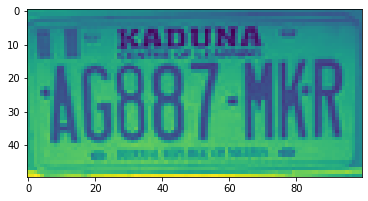

In [11]:
plt.imshow(data_x[7].reshape(50,100))

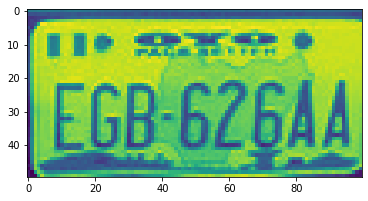

In [12]:
plt.imshow(data_x[16].reshape(50,100))

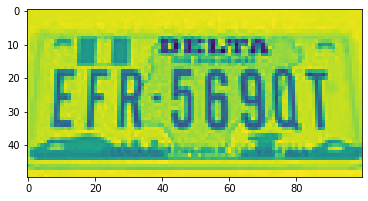

In [13]:
plt.imshow(data_x[15].reshape(50,100))

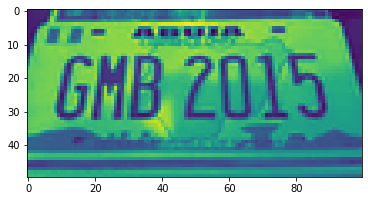

In [14]:
plt.imshow(data_x[27].reshape(50,100))

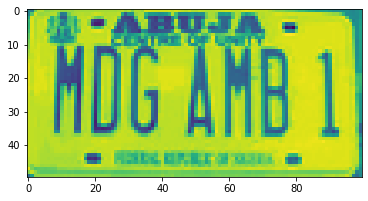

In [15]:
plt.imshow(data_x[37].reshape(50,100))

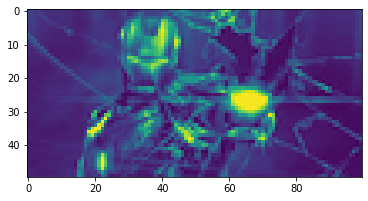

In [16]:
plt.imshow(data_x[56].reshape(50,100))